In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import datetime

SA_CO_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/CO/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/CO/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/CO/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/CO/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/CO/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/CO/2020.csv'])
, ignore_index=True)

In [3]:
import datetime
# the data is collected across multiple sites daily
# TODO: Consider the geographical distribution of the sites and their proximity to each other.
# this function calculates the daily average across all sites - Spatial aggregation
def calculate_daily_average(dataset, date_column, pollutant):
  # Ensure the date column is in datetime format
  dataset[date_column] = pd.to_datetime(dataset[date_column])
  dataset[date_column] = dataset[date_column].dt.date
  daily_avg = dataset.groupby(date_column)[pollutant].mean().reset_index()

  return daily_avg


In [4]:
SA_CO_full = calculate_daily_average(SA_CO_full, 'Date', 'Daily Max 8-hour CO Concentration')

In [5]:
# Some of the dataset contain missing dates
# this method finds those dates
def find_missing_dates(data, date_column):
  # Ensure the date column is in datetime format
  data[date_column] = pd.to_datetime(data[date_column])
  # Create a full range od dates
  min_date = data[date_column].min()
  max_date = data[date_column].max()
  full_dates = pd.date_range(start=min_date, end=max_date, freq='D')

  # Find missing dates
  missing_dates = full_dates.difference(data[date_column])

  return missing_dates

In [6]:
missing_dates = find_missing_dates(SA_CO_full, 'Date')

In [7]:
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [8]:
SA_NO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/NO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/NO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/NO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/NO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/NO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/NO2/2020.csv'])
, ignore_index=True)

In [9]:
SA_NO2_full = calculate_daily_average(SA_NO2_full, 'Date', 'Daily Max 1-hour NO2 Concentration')
missing_dates = find_missing_dates(SA_NO2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [10]:
SA_Ozone_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/Ozone/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/Ozone/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/Ozone/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/Ozone/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/Ozone/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/Ozone/2020.csv'])
, ignore_index=True)

In [11]:
SA_Ozone_full = calculate_daily_average(SA_Ozone_full, 'Date', 'Daily Max 8-hour Ozone Concentration')
missing_dates = find_missing_dates(SA_Ozone_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31'],
              dtype='datetime64[ns]', freq=None)


In [12]:
def process_data(data,  date_column, missing_dates):
  # Convert 'Date' column to datetime if it is not already
  data[date_column] = pd.to_datetime(data[date_column])

  # Set 'Date' as the index
  data.set_index(date_column, inplace=True)

  # Add the missing dates to the DataFrame with NaN values
  data = data.reindex(data.index.union(missing_dates))

  #Reset index to make 'Date' a regular column again
  data.reset_index(inplace=True)

  data.fillna(0, inplace=True)

  return data


In [13]:
SA_Ozone_full = process_data(SA_Ozone_full, 'Date', missing_dates)

In [14]:
# manually add 2020-12-31
new_entry = {'index': pd.to_datetime('2020-12-31'), 'Daily Max 8-hour Ozone Concentration': 0.0326668}
SA_Ozone_full.loc[len(SA_Ozone_full)] = new_entry

In [15]:
SA_Ozone_full.reset_index(drop=True, inplace=True)

In [16]:
SA_PM2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM2.5/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM2.5/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM2.5/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM2.5/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM2.5/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM2.5/2020.csv'])
, ignore_index=True)

In [17]:
SA_PM2_full = calculate_daily_average(SA_PM2_full, 'Date', 'Daily Mean PM2.5 Concentration')
missing_dates = find_missing_dates(SA_PM2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [18]:
SA_PM10_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM10/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM10/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM10/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM10/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM10/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/PM10/2020.csv'])
, ignore_index=True)

In [19]:
SA_PM10_full = calculate_daily_average(SA_PM10_full, 'Date', 'Daily Mean PM10 Concentration')
missing_dates = find_missing_dates(SA_PM10_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-01-04', '2015-01-05', '2015-01-07', '2015-01-08',
               '2015-01-10', '2015-01-11', '2015-01-14', '2015-01-16',
               '2015-01-17', '2015-01-19',
               ...
               '2020-12-13', '2020-12-15', '2020-12-16', '2020-12-19',
               '2020-12-21', '2020-12-22', '2020-12-24', '2020-12-25',
               '2020-12-27', '2020-12-28'],
              dtype='datetime64[ns]', length=1415, freq=None)


In [20]:
SA_PM10_full = process_data(SA_PM10_full, 'Date', missing_dates)

In [21]:
SA_SO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/SO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/SO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/SO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/SO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/SO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/San-Diego/SO2/2020.csv'])
, ignore_index=True)

In [22]:
SA_SO2_full = calculate_daily_average(SA_SO2_full, 'Date', 'Daily Max 1-hour SO2 Concentration')
missing_dates = find_missing_dates(SA_SO2_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-02-27', '2015-03-02', '2015-03-03', '2015-04-01',
               '2015-04-07', '2015-06-11', '2015-06-17', '2015-07-15',
               '2015-07-23', '2015-07-27',
               ...
               '2020-04-27', '2020-04-28', '2020-05-28', '2020-06-30',
               '2020-10-09', '2020-10-10', '2020-11-06', '2020-11-13',
               '2020-12-04', '2020-12-30'],
              dtype='datetime64[ns]', length=160, freq=None)


In [23]:
SA_SO2_full = process_data(SA_SO2_full, 'Date', missing_dates)

In [24]:
SA_CO_full.rename(columns = {'index':'Date'}, inplace = True)
SA_NO2_full.rename(columns = {'index':'Date'}, inplace = True)
SA_Ozone_full.rename(columns = {'index':'Date'}, inplace = True)
SA_PM2_full.rename(columns = {'index':'Date'}, inplace = True)
SA_PM10_full.rename(columns = {'index':'Date'}, inplace = True)
SA_SO2_full.rename(columns = {'index':'Date'}, inplace = True)

In [25]:
from functools import reduce
combine = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [SA_CO_full,SA_NO2_full,SA_Ozone_full,SA_PM2_full,SA_PM10_full,SA_SO2_full])

In [26]:
combine.head()

,Date,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean PM2.5 Concentration,Daily Mean PM10 Concentration,Daily Max 1-hour SO2 Concentration
0,2015-01-01,1.100000,22.125,0.038727,19.000000,NaN,0.2
1,2015-01-02,0.900000,30.750,0.038545,13.416667,NaN,0.2
2,2015-01-03,1.000000,26.500,0.042727,14.777778,27.0,0.2
3,2015-01-04,1.033333,33.875,0.036273,18.000000,0.0,0.2
4,2015-01-05,1.333333,34.750,0.028000,7.466667,0.0,0.7


In [27]:
combine.rename(columns = {'Daily Max 8-hour CO Concentration':'CO', 'Daily Max 1-hour NO2 Concentration': 'NO2',
                          'Daily Max 8-hour Ozone Concentration': 'Ozone', 'Daily Mean PM2.5 Concentration': 'PM2.5',
                          'Daily Mean PM10 Concentration': 'PM10', 'Daily Max 1-hour SO2 Concentration': 'SO2' }, inplace = True)

In [28]:
combine

,Date,CO,NO2,Ozone,PM2.5,PM10,SO2
0,2015-01-01,1.100000,22.125000,0.038727,19.000000,NaN,0.2
1,2015-01-02,0.900000,30.750000,0.038545,13.416667,NaN,0.2
2,2015-01-03,1.000000,26.500000,0.042727,14.777778,27.0,0.2
3,2015-01-04,1.033333,33.875000,0.036273,18.000000,0.0,0.2
4,2015-01-05,1.333333,34.750000,0.028000,7.466667,0.0,0.7
...,...,...,...,...,...,...,...
2187,2020-12-27,0.500000,13.222222,0.033750,14.766667,0.0,0.2
2188,2020-12-28,0.400000,12.111111,0.037125,9.000000,0.0,0.0
2189,2020-12-29,0.700000,23.444444,0.033625,6.180000,13.5,0.2
2190,2020-12-30,0.700000,28.777778,0.030286,10.116667,NaN,0.0


In [29]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [30]:
# descriptive statistics of the data
print(combine.describe())

                CO          NO2        Ozone        PM2.5         PM10  \
count  2192.000000  2192.000000  2192.000000  2192.000000  2188.000000   
mean      0.550886    18.368644     0.044059     9.665901     8.358267   
std       0.226715     9.076388     0.008438     4.351755    13.557702   
min       0.200000     3.125000     0.000000     1.483333     0.000000   
25%       0.366667    10.777778     0.038900     6.692857     0.000000   
50%       0.500000    16.714286     0.043714     9.218333     0.000000   
75%       0.700000    25.000000     0.049200    11.889286    17.000000   
max       1.500000    52.400000     0.077000    51.850000   127.333333   

               SO2  
count  2192.000000  
mean      0.223266  
std       0.198273  
min       0.000000  
25%       0.100000  
50%       0.200000  
75%       0.300000  
max       3.500000  


In [31]:
# show intensity of each pollutant over time
fig = go.Figure()

for pollutant in ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']:
  fig.add_trace(go.Scatter(x=combine['Date'], y=combine[pollutant], mode='lines',
                           name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Los Angeles',
                  xaxis_title='Date', yaxis_title='Concentration (ug/m3)')

fig.show()

In [32]:
#Calculate Air Quality Index
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
  for low, high, aqi in aqi_breakpoints:
    if low <= concentration <= high:
      return aqi
  return None

def calculate_overall_aqi(row):
  aqi_values = []
  pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
  for pollutant in pollutants:
    aqi = calculate_aqi(pollutant, row[pollutant])
    if aqi is not None:
      aqi_values.append(aqi)
  return max(aqi_values)


# Calculate AQI for each row
combine['AQI'] = combine.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
  for low, high, category in aqi_categories:
    if low <= aqi_value <= high:
      return category
  return None

In [33]:
#Categorize AQI
combine['AQI Category'] = combine['AQI'].apply(categorize_aqi)
print(combine.head())

        Date        CO     NO2     Ozone      PM2.5  PM10  SO2  AQI  \
0 2015-01-01  1.100000  22.125  0.038727  19.000000   NaN  0.2  100   
1 2015-01-02  0.900000  30.750  0.038545  13.416667   NaN  0.2  100   
2 2015-01-03  1.000000  26.500  0.042727  14.777778  27.0  0.2  100   
3 2015-01-04  1.033333  33.875  0.036273  18.000000   0.0  0.2  100   
4 2015-01-05  1.333333  34.750  0.028000   7.466667   0.0  0.7  100   

  AQI Category  
0     Moderate  
1     Moderate  
2     Moderate  
3     Moderate  
4     Moderate  


In [34]:
asthma_data = pd.read_csv('gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/asthma-hospitalization-rates-by-county.csv', encoding="ISO-8859-1")

asthma_data['NUMBER OF HOSPITALIZATIONS'] = asthma_data['NUMBER OF HOSPITALIZATIONS'].str.replace(',', '').astype(float)

print(asthma_data.head())

       COUNTY  YEAR            STRATA STRATA NAME AGE GROUP  \
0  California  2015  Total population    All ages  All ages   
1     Alameda  2015  Total population    All ages  All ages   
2      Alpine  2015  Total population    All ages  All ages   
3      Amador  2015  Total population    All ages  All ages   
4       Butte  2015  Total population    All ages  All ages   

   NUMBER OF HOSPITALIZATIONS  AGE-ADJUSTED HOSPITALIZATION RATE COMMENT  
0                     27262.0                                7.0     NaN  
1                      1435.0                                9.3     NaN  
2                         0.0                                0.0     NaN  
3                        28.0                                7.5     NaN  
4                       143.0                                6.7     NaN  


In [38]:
combine['COUNTY'] = 'San Diego'

In [39]:
combine['Date'] = pd.to_datetime(combine['Date'])
combine_yearly = combine.groupby(['COUNTY',combine['Date'].dt.year]).mean().reset_index()
combine_yearly.rename(columns = {'Date':'YEAR'}, inplace = True)
merged_data = pd.merge(asthma_data, combine_yearly, how='inner', left_on=['COUNTY', 'YEAR'], right_on=['COUNTY', 'YEAR'])
# Perform correlation analysis
correlation_matrix = merged_data[['NUMBER OF HOSPITALIZATIONS', 'CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI']].corr()

<ipython-input-39-28fbee1b0bae>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [40]:
merged_data.head(5)

,COUNTY,YEAR,STRATA,STRATA NAME,AGE GROUP,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE,COMMENT,CO,NO2,Ozone,PM2.5,PM10,SO2,AQI
0,San Diego,2015,Total population,All ages,All ages,1927.0,6.0,NaN,0.550342,20.785835,0.042574,8.739293,7.623209,0.246575,95.753425
1,San Diego,2015,Child vs. adult,017 years,017 years,788.0,10.4,NaN,0.550342,20.785835,0.042574,8.739293,7.623209,0.246575,95.753425
2,San Diego,2015,Child vs. adult,18+ years,18+ years,1139.0,4.5,NaN,0.550342,20.785835,0.042574,8.739293,7.623209,0.246575,95.753425
3,San Diego,2015,Age groups,04 years,04 years,440.0,20.4,NaN,0.550342,20.785835,0.042574,8.739293,7.623209,0.246575,95.753425
4,San Diego,2015,Age groups,517 years,517 years,348.0,6.7,NaN,0.550342,20.785835,0.042574,8.739293,7.623209,0.246575,95.753425


In [41]:
print(correlation_matrix)

                            NUMBER OF HOSPITALIZATIONS        CO       NO2  \
NUMBER OF HOSPITALIZATIONS                    1.000000  0.019374  0.262047   
CO                                            0.019374  1.000000  0.229320   
NO2                                           0.262047  0.229320  1.000000   
Ozone                                        -0.009844  0.585119 -0.051486   
PM2.5                                        -0.292284 -0.068591 -0.572586   
SO2                                           0.186403  0.475000  0.374334   
AQI                                          -0.035656  0.240644  0.447414   

                               Ozone     PM2.5       SO2       AQI  
NUMBER OF HOSPITALIZATIONS -0.009844 -0.292284  0.186403 -0.035656  
CO                          0.585119 -0.068591  0.475000  0.240644  
NO2                        -0.051486 -0.572586  0.374334  0.447414  
Ozone                       1.000000 -0.303857  0.493062 -0.263787  
PM2.5                      -0.

In [ ]:
# AQI over time
fig = px.bar(combine, x="Date", y="AQI",
             title="AQI of Los Angeles from 2015 - 2020")
fig.update_xaxes(title='Date')
fig.update_yaxes(title="AQI")
fig.show()

In [ ]:
# AQI Category distribution
fig = px.histogram(combine, x="Date",
                   color="AQI Category",
                   title="AQI Category Distribution Over Time")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.show()

In [ ]:
# Distribution of Pollutants in the air quality of Los Angeles
pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = combine[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Los Angeles",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

In [ ]:
# Correlation Between Pollutants
correlation_matrix = combine[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [42]:
# Correlation Between Pollutants and Number of Hospitalization
parameters = ['CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI', 'NUMBER OF HOSPITALIZATIONS']
correlation_matrix = merged_data[parameters].corr()
fig = px.imshow(correlation_matrix, x=parameters, y=parameters, title="Correlation Between Pollutants and No. of Hospitalization")
fig.show()

In [ ]:
combine['Day_of_Week'] = combine['Date'].dt.day_name()
average_aqi_by_day = combine.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_day, x=average_aqi_by_day.index, y="AQI",
              title="Average AQI by Day Trends in San Diego")
fig.update_xaxes(title="Day of the Week")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
combine['Year'] = combine['Date'].dt.year
average_aqi_by_year = combine.groupby('Year')['AQI'].mean()

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_year, x=average_aqi_by_year.index, y="AQI",
              title="Average AQI by Year Trends in San Diego")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import calendar
combine['Month'] = combine['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
average_aqi_by_month = combine.groupby('Month')['AQI'].mean()
# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_month, x=average_aqi_by_month.index, y="AQI",
              title="Average AQI by Month Trends in Los Angeles")
fig.update_xaxes(title="Months")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Convert 'Date' to datetime and set it as the index
combine['Date'] = pd.to_datetime(combine['Date'])
combine.set_index('Date', inplace=True)

In [ ]:
# Feature Scaling
scaler = MinMaxScaler()
combine['AQI_scaled'] = scaler.fit_transform(combine['AQI'].values.reshape(-1,1))

In [ ]:
# Define sequence length and number of future time steps to predict
sequence_length = 30
#num_future_steps = 3 # Adjust according to needs

# function to create sequences for LSTM
def create_sequences(data, seq_length):
  X = []
  y = []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

In [ ]:
 #Create sequences with multiple future time steps
X, y = create_sequences(combine['AQI_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
#X_train = X_train.reshape((X_train.shape[0], sequence_length, len(target_variable)))
#X_test = X_test.reshape((X_test.shape[0], sequence_length, len(target_variable )))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model.compile(optimizer='adam', loss='mse')

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 8s 51ms/step - loss: 0.0601 - val_loss: 0.0223
Epoch 2/50
44/44 [==============================] - 4s 88ms/step - loss: 0.0236 - val_loss: 0.0221
Epoch 3/50
44/44 [==============================] - 3s 64ms/step - loss: 0.0232 - val_loss: 0.0221
Epoch 4/50
44/44 [==============================] - 2s 42ms/step - loss: 0.0228 - val_loss: 0.0219
Epoch 5/50
44/44 [==============================] - 2s 41ms/step - loss: 0.0230 - val_loss: 0.0217
Epoch 6/50
44/44 [==============================] - 2s 43ms/step - loss: 0.0228 - val_loss: 0.0216
Epoch 7/50
44/44 [==============================] - 2s 42ms/step - loss: 0.0227 - val_loss: 0.0216
Epoch 8/50
44/44 [==============================] - 2s 43ms/step - loss: 0.0228 - val_loss: 0.0220
Epoch 9/50
44/44 [==============================] - 4s 88ms/step - loss: 0.0226 - val_loss: 0.0215
Epoch 10/50
44/44 [==============================] - 3s 69ms/step - loss: 0.0227 - val_loss: 0.0221
Epoch 11/

In [ ]:
# make predictions
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 0s 8ms/step


In [ ]:
# evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(combine['AQI'][train_size+sequence_length:], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 813.5904445835642


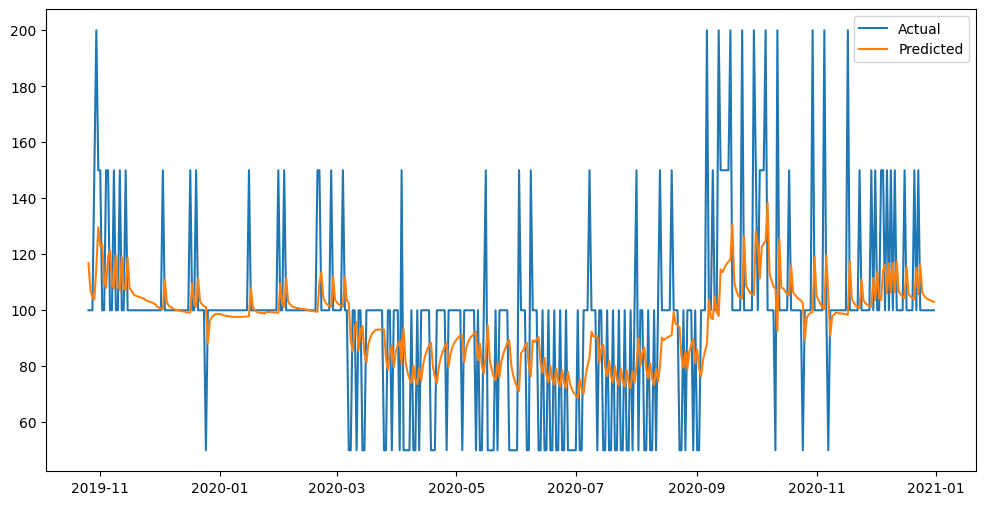

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['AQI'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictions, label='Predicted')
plt.legend()

In [ ]:
# Pollutant CO
combine['CO_scaled'] = scaler.fit_transform(combine['CO'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_CO, y_CO = create_sequences(combine['CO_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_CO_train, X_CO_test = X_CO[:train_size], X_CO[train_size:]
y_CO_train, y_CO_test = y_CO[:train_size], y_CO[train_size:]

In [ ]:
# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model2.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model2.compile(optimizer='adam', loss='mse')

In [ ]:
X_CO_train = X_CO_train.reshape((X_CO_train.shape[0], X_CO_train.shape[1], 1))
# Train the model
model2.fit(X_CO_train, y_CO_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 7s 51ms/step - loss: 0.0384 - val_loss: 0.0124
Epoch 2/20
44/44 [==============================] - 2s 42ms/step - loss: 0.0143 - val_loss: 0.0100
Epoch 3/20
44/44 [==============================] - 2s 44ms/step - loss: 0.0128 - val_loss: 0.0096
Epoch 4/20
44/44 [==============================] - 2s 42ms/step - loss: 0.0127 - val_loss: 0.0092
Epoch 5/20
44/44 [==============================] - 2s 42ms/step - loss: 0.0124 - val_loss: 0.0092
Epoch 6/20
44/44 [==============================] - 3s 75ms/step - loss: 0.0120 - val_loss: 0.0090
Epoch 7/20
44/44 [==============================] - 3s 80ms/step - loss: 0.0117 - val_loss: 0.0091
Epoch 8/20
44/44 [==============================] - 2s 44ms/step - loss: 0.0116 - val_loss: 0.0086
Epoch 9/20
44/44 [==============================] - 2s 42ms/step - loss: 0.0112 - val_loss: 0.0084
Epoch 10/20
44/44 [==============================] - 2s 41ms/step - loss: 0.0109 - val_loss: 0.0082
Epoch 11/

In [ ]:
# make predictions
X_CO_test = X_CO_test.reshape((X_CO_test.shape[0], X_CO_test.shape[1], 1))
predictionsCO = model2.predict(X_CO_test)
predictionsCO = scaler.inverse_transform(predictionsCO)

14/14 [==============================] - 0s 6ms/step


In [ ]:
# evaluate the performance of the model
mseCO = mean_squared_error(combine['CO'][train_size+sequence_length:], predictionsCO)
print(f'Mean Squared Error: {mseCO}')

Mean Squared Error: 0.02131724069556448


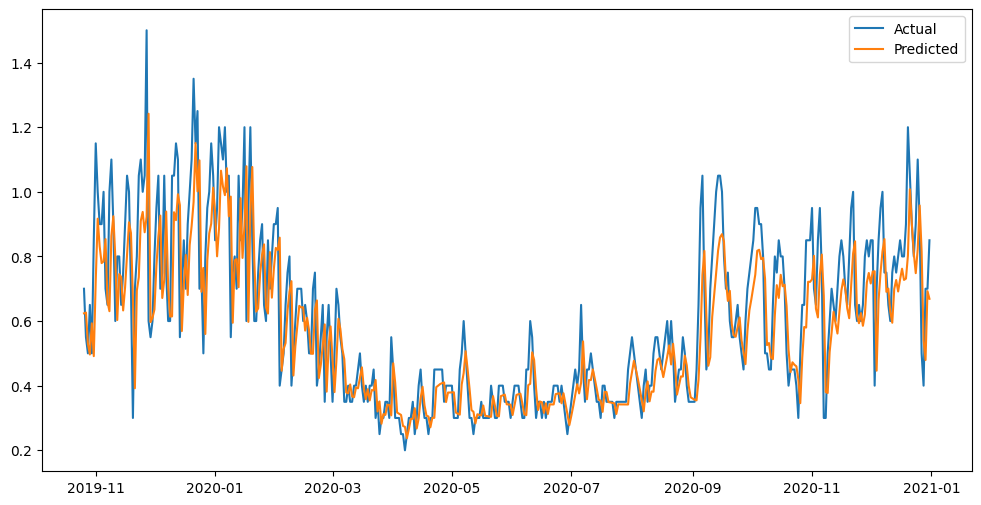

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['CO'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsCO, label='Predicted')
plt.legend()

In [ ]:
model2.save('San-Deigo-CO.keras')

In [ ]:
model.save('San-Deigo-AQI.keras')

In [ ]:
# Pollutant PM2.5
combine['PM2.5_scaled'] = scaler.fit_transform(combine['PM2.5'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_PM, y_PM = create_sequences(combine['PM2.5_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_PM_train, X_PM_test = X_PM[:train_size], X_PM[train_size:]
y_PM_train, y_PM_test = y_PM[:train_size], y_PM[train_size:]

In [ ]:
# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model3.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model3.compile(optimizer='adam', loss='mse')

In [ ]:
X_PM_train = X_PM_train.reshape((X_PM_train.shape[0], X_PM_train.shape[1], 1))
# Train the model
model3.fit(X_PM_train, y_PM_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 4s 49ms/step - loss: 0.0050 - val_loss: 0.0033
Epoch 2/20
44/44 [==============================] - 2s 44ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 3/20
44/44 [==============================] - 4s 81ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 4/20
44/44 [==============================] - 3s 69ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 5/20
44/44 [==============================] - 2s 41ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 6/20
44/44 [==============================] - 2s 43ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 7/20
44/44 [==============================] - 2s 44ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 8/20
44/44 [==============================] - 2s 41ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 9/20
44/44 [==============================] - 2s 44ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/20
44/44 [==============================] - 4s 84ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 11/

In [ ]:
# make predictions
X_PM_test = X_PM_test.reshape((X_PM_test.shape[0], X_PM_test.shape[1], 1))
predictionsPM = model3.predict(X_PM_test)
predictionsPM = scaler.inverse_transform(predictionsPM)

14/14 [==============================] - 0s 6ms/step


In [ ]:
# evaluate the performance of the model
msePM = mean_squared_error(combine['PM2.5'][train_size+sequence_length:], predictionsPM)
print(f'Mean Squared Error: {msePM}')

Mean Squared Error: 12.128960390293987


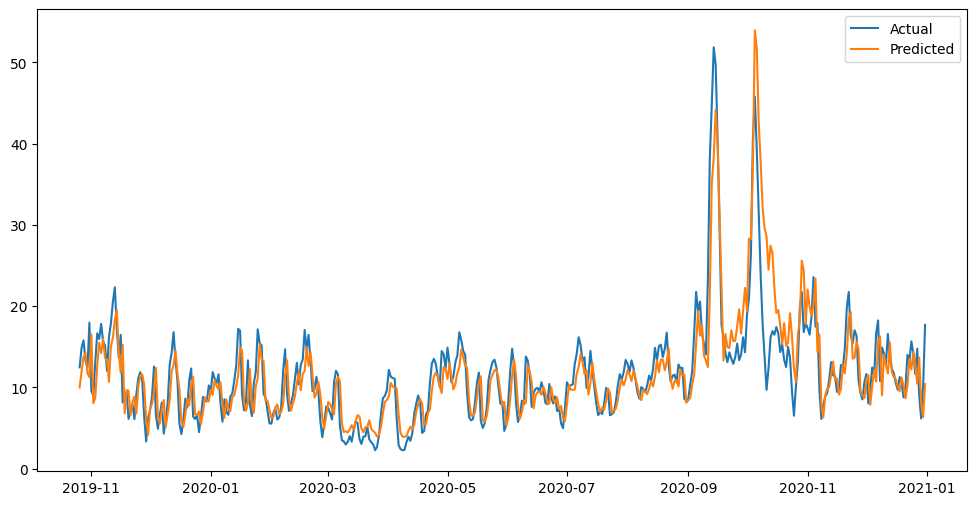

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['PM2.5'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsPM, label='Predicted')
plt.legend()

In [ ]:
model3.save('San-Deigo-PM2.5.keras')